# **Inferencia estadística**
# IE05. Distribuciones de probabilidad continuas

## <font color='blue'>__Bibliografía__</font>
* Estadística para Administración y Economía. Paul Newbold, William L. Carlson y Betty Thorne, 2013.

* Estadística Aplicada a los Negocios y la Economía. Allen L. Webster, 2000.

* Fundamentos de Estadística. Peña Sánchez de Rivera, Daniel, 2008.

## <font color='blue'>__Lecturas__</font>

* López-Briega, R. (2016). Distribuciones de probabilidad con Python.

* Nathaly Andreina Rivera Suescun (2018). Distribuciones de probabilidad con Python. www.medium.com.

*  Bourne, Murray (2020). "11. Probability Distributions - Concepts". Interactive Mathematics [www.intmath.com](https://www.intmath.com/counting-probability/11-probability-distributions-concepts.php
)  

Nota: Los contenios de este notebook están basados en el trabajo de Raúl E. López Briega. El contenido esta bajo la licencia BSD de Raúl E. López Briega.

In [ ]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

## <font color='blue'>**Distribuciones continuas**</font>

Ahora que ya conocemos las principales **distribuciones discretas**, podemos pasar a describir a las [distribuciones continuas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua); en ellas a diferencia de lo que veíamos antes, la variable puede tomar cualquier valor dentro de un intervalo específico. Dentro de este grupo vamos a encontrar a las siguientes:

### <font color='blue'>**Distribución Uniforme Continua**</font>

La [Distribución Uniforme Continua](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme_continua) es útil para describir una variable aleatoria con probabilidad constante sobre el intervalo $(a,b)$ en el que está definida y se denota por: $$X \backsim U(a,b)$$

Parámetros:<br>
$a$: mínimo, $-\infty \lt a \lt \infty$<br>
$b$: máximo, $-\infty \lt b \lt \infty$, con $a \lt b$<br>

También es conocida con el nombre de **distribución rectangular** por el aspecto de su función de
densidad.

La Distribución Uniforma Continua es expresada por la función:
<br><br>
$$
f(x) =
\begin{cases}
\frac{1}{b -a} &\mbox{para} \ a \le x \le b
\\
0 &\mbox{de lo contrario}
\end{cases}
$$
<br>
Una peculiaridad importante de esta distribución es que la probabilidad de un suceso depende exclusivamente de la amplitud del intervalo considerado y no de su posición en el campo de variación de la variable. Cualquiera que sea la distribución $F$ de cierta variable $X$, la variable transformada $Y = F(X)$
sigue una distribución uniforme en el intervalo (0,1). Esta propiedad es fundamental por ser la base para la generación de números aleatorios de cualquier distribución en las técnicas de simulación, y recibe el nombre de **método de inversión**.

Su función de distribución acumulada esta entonces dada por:
<br><br>
$$
F(x) = P(X \lt x) =
\begin{cases}
0  & \mbox{si }\; x \lt a \\
\frac{x-a}{b-a} & \mbox{si }\; a \le x \le b \\
1 & \mbox{si }\; b \gt x
\end{cases}
$$
<br>
Todos los valores tienen la misma probabilidad.

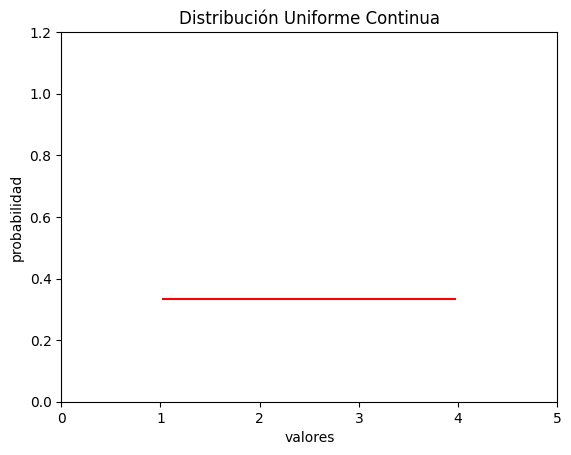

In [ ]:
# Graficando Uniforme Continua
# ATENCION: en scipy.stats el parametro b es un rango que se suma al parámetro a
# Luego si queremos obtener
# a = 1
# b = 4
# Tenemos que hacer b = b - a
a = 1
b = 4 - a

uniforme_c = stats.uniform(a, b)
x = np.linspace(uniforme_c.ppf(0.01),
                uniforme_c.ppf(0.99), 100)
fp = uniforme_c.pdf(x) # Función de Probabilidad

fig, ax = plt.subplots()
ax.plot(x, fp, color='r')
ax.set_xticks([0, 1, 2, 3, 4, 5])

ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme Continua')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

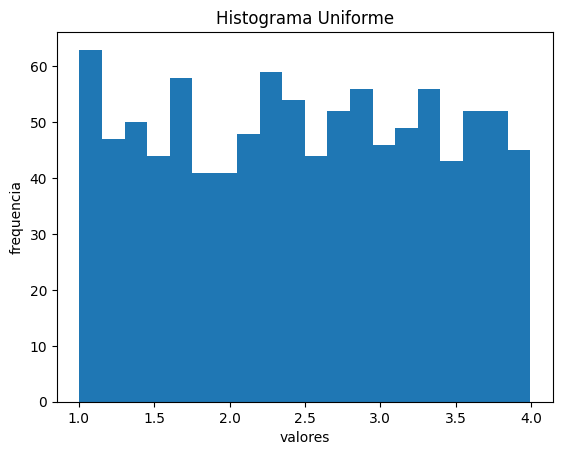

In [ ]:
# histograma
aleatorios_c = uniforme_c.rvs(1000) # genera aleatorios
frecuencia, bins, ignorar = plt.hist(aleatorios_c, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Uniforme')
plt.show()

### <font color='green'>Actividad  1</font>

Un contratista A está preparando una oferta sobre un nuevo proyecto de construcción. La oferta sigue una distribución uniforme entre 55 y 75 millones de pesos. Determínese:
1. La probabilidad de que la oferta sea superior a 60 millones de pesos.
2. La media y la desviación estándar de la oferta.

In [ ]:
# Tu código aquí ...
a = 55
b = 75

# Probabilidad de que la oferta sea superior a 60 millones
prob_sobre_60_millones = 1 - (60 - a) / (b - a)
print(f'La probabilidad de que la oferta sea superior a 60 millones es {prob_sobre_60_millones:.4f}')


La probabilidad de que la oferta sea superior a 60 millones es 0.7500


In [ ]:
# Cálculo de la media y desviación estándar
mu = (a + b) / 2
sigma = ((b - a)**2 / 12)**0.5

print(f'La media de la oferta es {mu:.2f} millones de pesos')
print(f'La desviación estándar de la oferta es {sigma:.2f} millones de pesos')


La media de la oferta es 65.00 millones de pesos
La desviación estándar de la oferta es 5.77 millones de pesos


<font color='green'>Fin actividad 1</font>

### <font color='blue'>**Distribución Normal**</font>


La [Distribución Normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) es, sin duda, la distribución de probabilidad más importante del Cálculo de probabilidades y de la Estadística. Fue descubierta, como aproximación de la distribución binomial, por Abraham De Moivre (1667-1754) y publicada en 1733 en su libro The Doctrine of Chances; estos resultados fueron ampliados por Pierre-Simon Laplace (1749-1827), quién también realizó aportaciones importantes. En 1809, Carl Friedrich Gauss (1777-1855) publicó un libro sobre el movimiento de los cuerpos celestes donde asumía errores normales, por este motivo esta distribución también es conocida como distribución Gaussiana.

La importancia de la distribución normal queda totalmente consolidada por ser la
distribución límite de numerosas variables aleatorias, discretas y continuas, como se demuestra a través de los teoremas centrales del límite. Las consecuencias de estos teoremas implican la casi universal presencia de la distribución normal en todos los campos de las ciencias empíricas: biología, medicina, psicología, física, economía, etc.

Algunos ejemplos de variables asociadas a fenómenos naturales que siguen el modelo de la Distribución Normal son:
* Características morfológicas de individuos, como la estatura.
* Características sociológicas, como el consumo de cierto producto por un mismo grupo de individuos.
* Características psicológicas, como el cociente intelectual.
* Nivel de ruido en telecomunicaciones.
* Errores cometidos al medir ciertas magnitudes.
* En particular, muchas medidas de datos continuos en medicina y en biología (talla, presión arterial, etc.) se aproximan a la distribución normal.
* etc.

Si la variable aleatoria X sigue la distribución normal, sus
parámetros son $\mu$ y $\sigma^2$ es común utilizar la notación:

$$X \backsim N(\mu , \sigma^2)\ $$

Parámetros:

$\mu$: media, $-\infty \lt \mu \lt \infty$<br>
$\sigma$: desviación estándar, $\sigma \gt 0$<br>
Valores de la variable: $-\infty \lt x \lt \infty$<br>


Y se define función de densidad de la distribución Normal como:

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left(\frac{x - \mu}{\sigma} \right)^2}
$$


En donde $\mu$ es el parámetro de ubicación, y va a ser igual a la media aritmética y $\sigma$ es la desviación estándar.

## Distribución Normal Estándar
Cuando la distribución normal tiene como parámetros $\mu = 0$ y $\sigma = 1$ recibe el nombre de **distribución normal estándar**. Cualquier variable $X$ que siga una distribución normal de
parámetros $\mu$ y $\sigma$ se puede transformar en otra variable $Y= (X-\mu)/\sigma$ que sigue una distribución normal estándar; este proceso se denomina estandarización, tipificación o normalización.

A considerar:
* Entre el __primer sigma positivo__ y el __primer sigma negativo__ se encuentra el 68% de los casos.
* Entre el __segundo sigma positivo__ y el __segundo sigma negativo__ se encuentra el 95,5% de los casos.
* Entre el __tercer sigma positivo__ y el __tercer sigma negativo__ se encuentra el 99,73% de los casos.

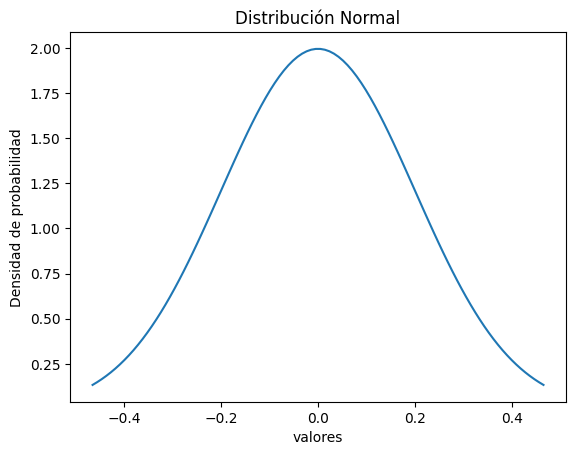

In [ ]:
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('valores')
plt.show()

In [ ]:
mean, var, skew, kurt = normal.stats(moments='mvsk')
print('Momentos')
print(f'Primer momento: Media = {mean: 4.2f}')
print(f'Segundo momento: Varianza = {var: 4.2f}')
print(f'Tercer momento: Asimetría (skewness) = {skew: 4.2f}')
print(f'Cuarto momento: Curtosis = {kurt: 4.2f}')

Momentos
Primer momento: Media =  0.00
Segundo momento: Varianza =  0.04
Tercer momento: Asimetría (skewness) =  0.00
Cuarto momento: Curtosis =  0.00


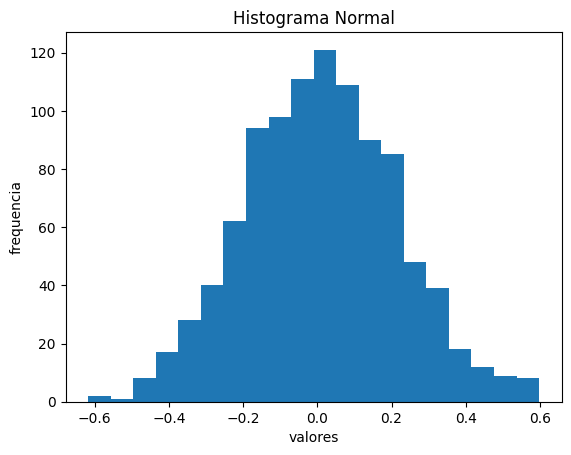

In [ ]:
# histograma
aleatorios_n = normal.rvs(1000) # genera aleatorios
frecuencia, bins, ignorar = plt.hist(aleatorios_n, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()

In [ ]:
# Calculemos los parámetros de la población
print(f'Media poblacional\t\t= {aleatorios_n.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_n.std():4.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_n):4.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_n)[0]} y se repite {stats.mode(aleatorios_n)[1]} veces')

Media poblacional		= 0.01
Desviación estándar poblacional	= 0.20
Mediana poblacional		= 0.01
Moda poblacional es -0.6170608514349079 y se repite 1 veces


Numpy también nos ayuda a crear distribuciones normales (y de otros tipos también).

In [ ]:
np.random.seed(1)
mu = 0 # loc
sigma = 1 # sigma
size = 1000
# Generamos la población con la semilla creada
# donde: np.random.normal(media, sigma, size)
n = np.random.normal(mu, sigma, size)

# esto es equivalente a
# rvs genera variables aleatorias; retorna un np.array
n2 = stats.norm.rvs(loc=mu, scale=sigma, size=size)

Grafiquemos ahora la KDE (Kernel Density Function)

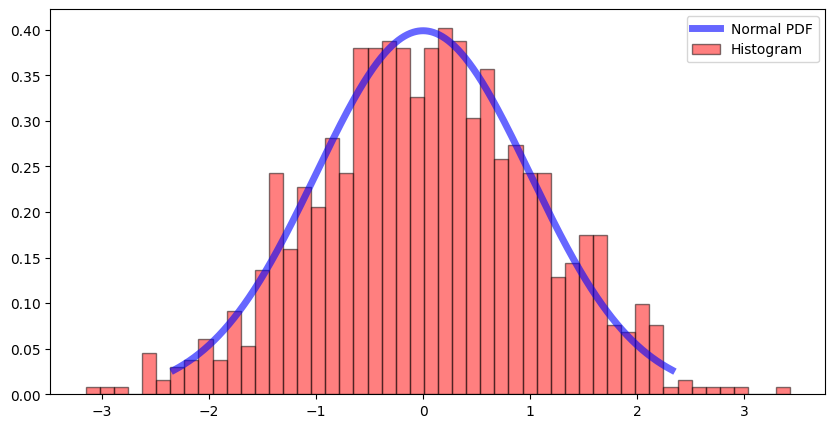

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))


# al generar el espacio lineal, debemos ajustar la ubicación y la escala
nx = np.linspace(stats.norm.ppf(0.01, loc=mu, scale=sigma),
                 stats.norm.ppf(0.99, loc=mu, scale=sigma), num=size)


ax.plot(nx, stats.norm.pdf(nx, loc=mu, scale=sigma),
        'b-',
        lw=5,
        alpha=0.6,
        label='Normal PDF')


#plt.plot(x, expon.pdf(e))
ax.hist(n2, bins=50,
        density=True,
        # histtype='stepfilled',
        color='r',
        alpha=0.5,
        edgecolor='black',
        label='Histogram')
plt.legend()
plt.show()

O la versión con **Seaborn** la cual muestra el KDE de forma automática en base activar (True) el argumento correspondiente (*kde*).


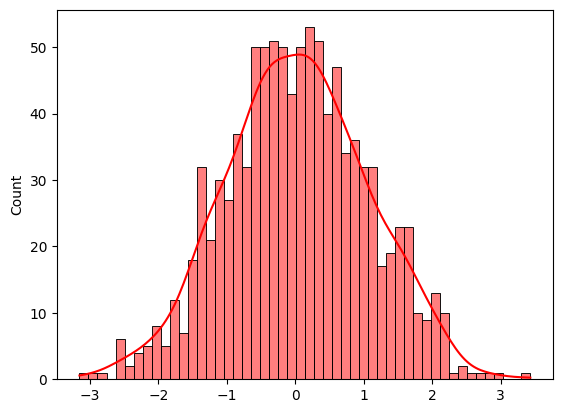

In [ ]:
import seaborn as sns

sns.histplot(n2, color="red", bins=50,
              kde=True,
             edgecolor='black', alpha=0.5)
plt.show()

### <font color='blue'>**Distribución T de Student**</font>

La [Distribución t de Student](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) fue propuesta y tabulada por William Sealy Gosset (1876-1937), más conocido por el seudónimo de Student, como resultado de un estudio sobre la estimación de la media cuando el tamaño de muestra es pequeño, estos resultados fueron publicados en 1908 en el artículo The Probable Error of a Mean.


Surge de cuando se plantea estudiar el cociente entre una variable aleatoria con distribución normal estándar y la raíz cuadrada del cociente entre una variable aleatoria con distribución chi-cuadrado y sus grados de libertad ($n$), siendo las dos variables independientes.

Es decir,

$$
\begin{split}
Z &\longrightarrow N(0,1) \\
Y &\longrightarrow \chi_{n}^2
\end{split}
$$

Se define la variable aleatoria X como:

$$ X= \frac{Z}{\sqrt {\frac{Y}{n}}}\$$

La distribución t de Student queda completamente definida por medio de sus grados de libertad, $n$, y se denota por

$$ X \backsim t_n$$

Parámetro:

$n$: grados de libertad, con $n \ge 1$, entero<br>
Valores: $-\infty \lt x \lt \infty$<br>

Esta distribución desempeña un papel muy importante en la inferencia estadística asociada a la teoría de muestras pequeñas y es usada habitualmente en el contraste de hipótesis para la media de una población o para comparar medias de dos poblaciones.

En cuanto a la forma que presenta su función de densidad cabe destacar las similitudes que mantiene con la función de densidad de la distribución normal estándar: forma acampanada, simétrica y centrada en el origen; la única diferencia existente entre ambas distribuciones es que la función de densidad de la t de Student presenta unas colas más pesadas (mayor
dispersión) que la normal.

Está dada por la función de densidad:

$$f(x) = \frac{\Gamma(\frac{n+1}{2})}{\sqrt{n\pi}\Gamma(\frac{n}{2})} \left( 1 + \frac{x^2}{2} \right)^{-\frac{n+1}{2}}
$$

<br>

En dónde la variable $x$ es un número real y el parámetro $n$ es un número entero positivo. La Distribución t de Student es utilizada para probar si la diferencia entre las *medias* de dos muestras de observaciones es estadísticamente significativa. Por ejemplo, las alturas de una muestra aleatoria de los jugadores de baloncesto podría compararse con las alturas de una muestra aleatoria de jugadores de fútbol; esta distribución nos podría ayudar a determinar si un grupo es significativamente más alto que el otro.

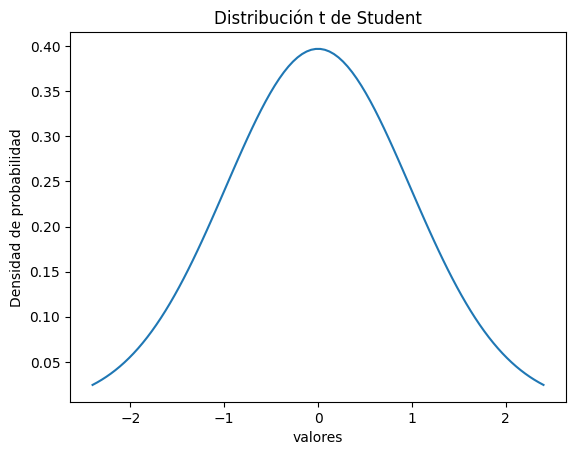

In [ ]:
# Graficando t de Student
df = 50 # parametro de forma, df = degrees of freedom (grados de libertad)
t = stats.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('valores')
plt.show()

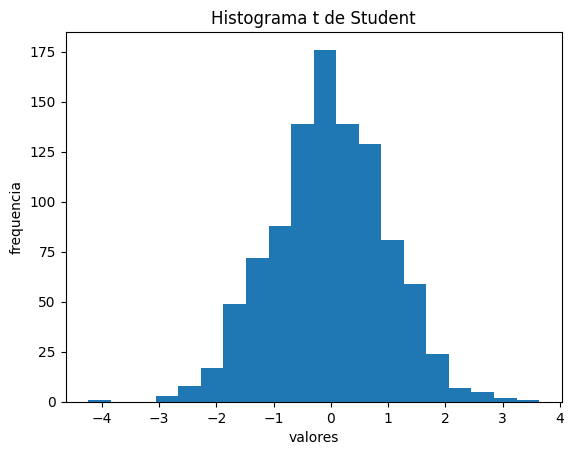

In [ ]:
# histograma
aleatorios = t.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma t de Student')
plt.show()

### <font color='green'>Actividad 2</font>
Determine gráficamente en qué condiciones de grados de libertad la distribución t-student se aproxima a una distribución _Normal(0,1)_.

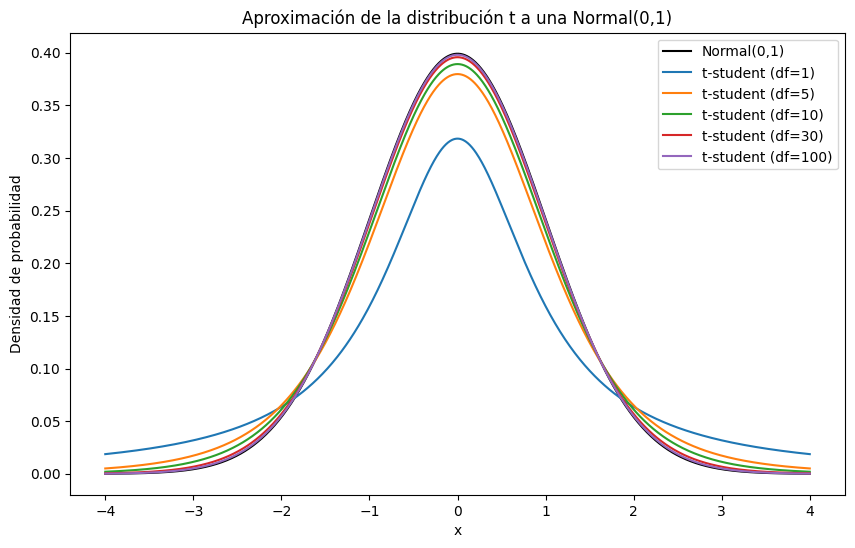

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Definimos los grados de libertad
df_values = [1, 5, 10, 30, 100]

# Definimos el rango de valores x
x = np.linspace(-4, 4, 1000)

# Creamos una figura
plt.figure(figsize=(10, 6))

# Densidad de probabilidad de la distribución normal estándar
plt.plot(x, norm.pdf(x, 0, 1), label='Normal(0,1)', color='black')

# Densidades de probabilidad de la distribución t de Student para diferentes df
for df_value in df_values:
    plt.plot(x, t.pdf(x, df_value), label=f't-student (df={df_value})')

# Añadimos etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Aproximación de la distribución t a una Normal(0,1)')
plt.legend()

# Mostramos la gráfica
plt.show()



La distribución t de Student se aproxima a la distribución normal estándar a medida que el número de grados de libertad (df) aumenta.


<font color='green'>Fin actividad 2</font>

### <font color='blue'>**Distribución Chi-cuadrado**</font>

La [Distribución Chi cuadrado](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2), debe su nombre al matemático inglés Karl Pearson (1857-1936). Es una distribución fundamental en inferencia estadística. Se emplea, entre otras muchas aplicaciones, para realizar:

* Pruebas de hipótesis.
* Pruebas de independencia (relación de dos variables).
* Pruebas de bondad de ajuste (como una muestra se ajusta o no a una distribución dada)
* Determinación de los límites de confianza de la varianza muestral de una población normal.

Veremos estos conceptos más adelante.

Sean $Z_{1},\dots ,Z_{n}$  variables aleatorias independientes, tales que $Z_{i}\sim N(0,1)$, para $i=1,2,\dots ,n$, entonces la variable aleatoria $X$ definida por:

$$ {\begin{aligned}X&=Z_{1}^{2}+Z_{2}^{2}+\cdots +Z_{n}^{2}\\&=\sum _{i=1}^{n}Z_{i}^{2}\end{aligned}}$$

La variable aleatoria X sigue una  una distribución chi cuadrada con $n$ grados de libertad.

$$X \backsim \chi_{n}^2$$

Parámetro:

$n$: grados de libertad, con $n \ge 1$, entero<br>
Valores: $0 \lt x \lt \infty$<br>

Su fórmula está dada por la función:

$$f(x) = \frac{\left(\frac{1}{2}\right)^{\frac{n}{2}-1} e^{\frac{-x}{2}}}{\Gamma \left(\frac{n}{2}\right)}
$$




Una importante aplicación de la Distribución Chi-cuadrado es que cuando un conjunto de datos es representado por un modelo teórico, esta distribución puede ser utilizada para controlar cuan bien se ajustan los valores predichos por el modelo, y los datos realmente observados.

### Observación
Si $X$ sigue una distribución chi-cuadrado con $n$ grados de libertad, para valores de $n$ grandes ($n \ge 100$), entonces la variable
$Y = \sqrt{2X}$, sigue aproximadamente una distribución normal de
media $\sqrt{2n -1}$ y desviación estándar 1.

### ¿Qué son los grados de libertad?
Ver al final del notebook.

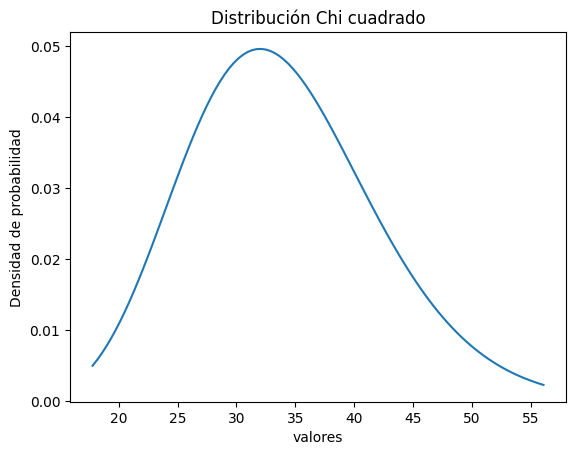

In [ ]:
# Graficando Chi cuadrado
df = 34 # parámetro de forma; df es 'degrees of freedom (grados de libertad)
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('valores')
plt.show()

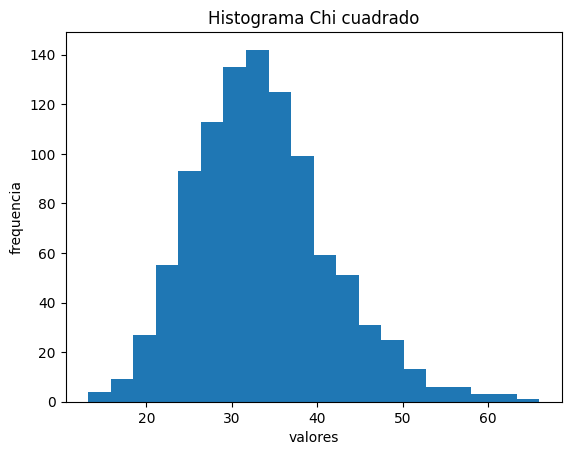

In [ ]:
# histograma
aleatorios_chi = chi2.rvs(1000) # genera aleatorios
frecuencia, bins, ignorar = plt.hist(aleatorios_chi, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi cuadrado')
plt.show()

### <font color='blue'>**Distribución de Exponencial**</font>

La [Distribución Exponencial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_exponencial) es aquella que modela el **tiempo transcurrido** entre
dos sucesos que se producen de forma independiente, separados y uniformes en
el tiempo.

Ejemplos de variables que se comportan de forma exponencial son:
* El tiempo que tarda una partícula radiactiva en desintegrarse.
* La datación de fósiles o cualquier materia orgánica mediante la técnica del carbono 14. Esto es, el tiempo que tarda una partícula radiactiva en desintegrarse.
* El tiempo de supervivencia.
* El tiempo transcurrido en un centro de llamadas hasta recibir la primera llamada del día se podría modelar como una exponencial.
* El intervalo de tiempo entre terremotos (de una determinada magnitud) sigue una distribución exponencial.
* Supongamos una máquina que produce hilo de alambre, la cantidad de metros de alambre hasta encontrar una falla en el alambre se podría modelar como una exponencial.
* En fiabilidad de sistemas, un dispositivo con tasa de fallo constante sigue una distribución exponencial.
* El grado de los nodos de un grafo del tipo Scale-Free.


Se dice que una variable aleatoria X sigue una distribución exponencial de parámetro λ, y se denota por:

$$ X ∼ exp(λ)$$

Parámetro:

$\lambda$: tasa de ocurrencia, con $\lambda \gt 0$

Valores: $0 \lt x \lt \infty$<br>


Su función de densidad:

$$f(x) = \lambda e^{-\lambda x}$$



Una característica importante de esta distribución es la propiedad conocida como “__falta de memoria__”. Esto significa, por ejemplo, que la probabilidad de que un individuo de edad $t$ sobreviva $x$ años más, hasta la edad $x+t$, es la misma que tiene un recién nacido de sobrevivir hasta la edad $x$. Dicho de manera más general, el tiempo transcurrido desde cualquier instante dado $t_0$ hasta que ocurre el evento, no depende de lo que haya ocurrido antes del instante $t_0$. Esta falta de memoria ha hecho que su aplicación sea restrictiva en disciplinas como la bioestadística.

### Observación

La Distribución Exponencial es un caso particular de la **distribución gamma** (cuando ésta presenta parametros $\alpha=1$ y $\beta=1$) y el equivalente continuo de la **distribución geométrica discreta**. Esta ley de distribución describe procesos en los que interesa saber el tiempo hasta que ocurre determinado evento; en particular, se utiliza para modelar tiempos de supervivencia. La función de densidad también se describe de la siguiente forma:

$$f(x) = \frac{1}{ \alpha} e^{\frac{-x}{\alpha}}$$
donde
$\alpha = \frac{1}{\lambda}$, y corresponde a la media o escala (en *scipy*)

En dónde tanto la variable $x$ como el parámetro $\alpha$ (o $\lambda$, según el caso) son números reales positivos.  

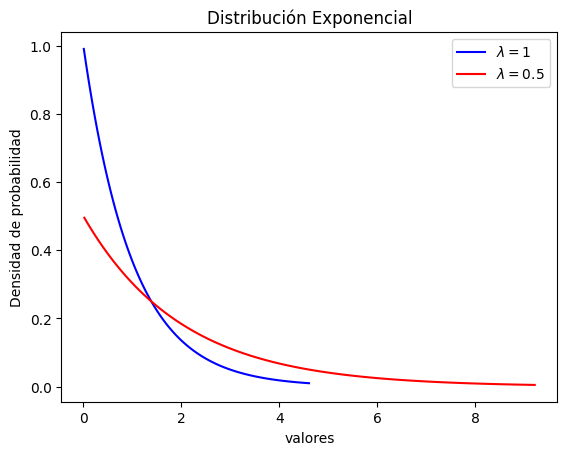

In [ ]:
# Graficando Exponencial
lambda1 = 1
lambda2 = 0.5
exponencial1 = stats.expon(loc=0, scale=1/lambda1)
exponencial2= stats.expon(loc=0, scale=1/lambda2)
x1 = np.linspace(exponencial1.ppf(0.01),
                exponencial1.ppf(0.99), 100)
x2 = np.linspace(exponencial2.ppf(0.01),
                exponencial2.ppf(0.99), 100)
fp1 = exponencial1.pdf(x1) # Función de Probabilidad
fp2 = exponencial2.pdf(x2) # Función de Probabilidad
plt.plot(x1, fp1, color='b', label=r'$\lambda = {}$'.format(lambda1))
plt.plot(x2, fp2, color='r', label='$\lambda = {}$'.format(lambda2))
plt.title('Distribución Exponencial')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('valores')
plt.legend(loc=1)
plt.show()

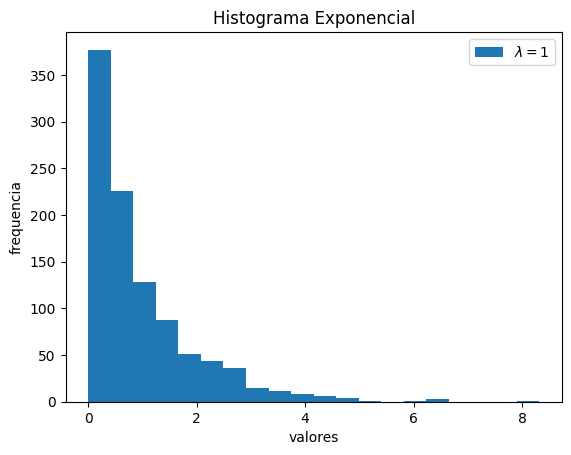

In [ ]:
# histograma
aleatorios_e = exponencial1.rvs(1000) # genera aleatorios
frecuencia, bins, ignorar = plt.hist(aleatorios_e, 20, label=r'$\lambda = {}$'.format(lambda1))
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.legend(loc=1)
plt.show()

### <font color='green'>Actividad 3</font>
Se ha comprobado que el tiempo de vida de cierto tipo de marcapasos sigue una distribución exponencial con media de 14 años.

¿Cuál es la probabilidad de que a una persona a la que se le ha implantado este marcapasos se le deba reimplantar otro antes de 20 años?

In [ ]:
# Tu código aquí ...
import scipy.integrate as spi

# Definimos la tasa de decaimiento (lambda)
lambda_ = 1/14

# Función de densidad de probabilidad (PDF)
pdf = lambda x: lambda_ * np.exp(-lambda_ * x)

# Calculamos la probabilidad usando la integral
probabilidad = spi.quad(pdf, 0, 20)[0]
print(f'La probabilidad de que se deba reimplantar otro marcapasos antes de 20 años es {probabilidad:.4f}')


La probabilidad de que se deba reimplantar otro marcapasos antes de 20 años es 0.7603


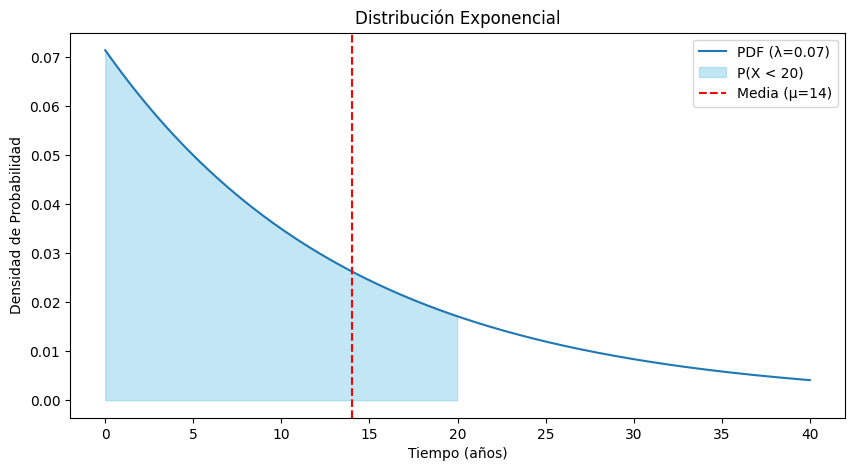

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Definimos la media y el parámetro de tasa lambda
mu = 14
lmbda = 1 / mu

# Definimos la función de densidad de probabilidad
x = np.linspace(0, 40, 1000)
pdf = lmbda * np.exp(-lmbda * x)

# Graficamos la PDF
plt.figure(figsize=(10, 5))
plt.plot(x, pdf, label=f'PDF (λ={lmbda:.2f})')
plt.fill_between(x, pdf, where=(x <= 20), color='skyblue', alpha=0.5, label='P(X < 20)')

# Añadimos la línea vertical que representa la media
plt.axvline(x=mu, color='red', linestyle='--', label=f'Media (μ={mu})')

# Añadimos etiquetas y leyenda
plt.title('Distribución Exponencial')
plt.xlabel('Tiempo (años)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostramos la gráfica
plt.show()



<font color='green'>Fin actividad 3</font>

### <font color='green'>Actividad 4</font>
Se tiene la siguiente muestra de datos la cual se estima que obedece a una distribución exponencial.
1. Plotéela
2. Determine sus parámetros $loc$, $scale$ y $\lambda$

TIP: Utilice el método __fit()__. Investigue su uso en Internet.

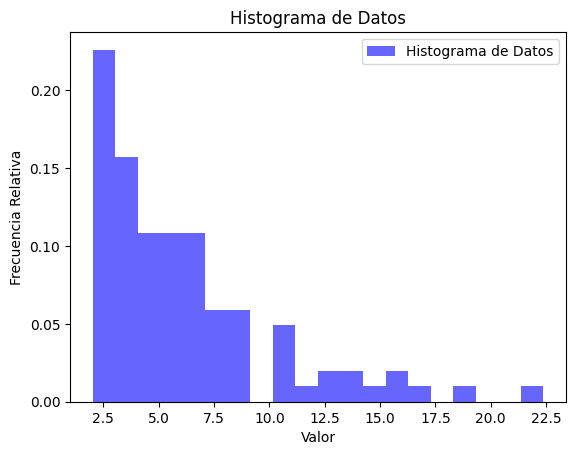

Parámetro loc estimado: 2.0120
Parámetro scale estimado: 4.1312
Parámetro λ estimado: 0.2421


In [ ]:
X = [8.40891032,  2.42979798,  7.41087626,  2.07658934,  2.07942102,
     2.05530865,  6.30994587,  3.99588973,  3.70707989, 10.43483448,
     14.70587022,  2.01200242,  3.06941852,  4.84832306,  9.00752525,
     9.07117813, 16.55833492, 22.38003406,  6.13678848,  4.7812562 ,
     10.68406001,  2.42418443,  2.37650181,  3.18491342,  5.96838502,
     6.52244823, 12.45317295,  5.39234417,  2.08042209,  4.40999034,
     6.07874162,  5.21970867,  2.77401095,  2.86450285,  3.25513552,
     8.93065797, 13.30397597,  6.1062236 ,  5.25363706,  3.98658329,
     8.73979283,  6.34348627,  3.43086867, 10.53076984,  2.70255324,
     2.90688431,  7.82853837,  3.39718563,  5.87617795, 10.76736805,
     18.70554873,  2.19083207,  3.28927204, 12.1232163 ,  2.24157214,
     3.99556614,  5.51093524,  7.35423425,  2.99553849,  6.62811081,
     2.49690948,  2.85070358,  3.12061713, 13.71521877,  4.80077239,
     4.86362772,  6.28718405,  2.23158758,  4.98815281,  7.56564173,
     7.47019838,  6.67810437,  6.64358648,  3.35564988,  5.03728286,
     6.21038159,  2.78578825,  2.37244931,  4.15946616,  5.97243514,
     3.42417909, 16.0417914 ,  5.47268766,  2.49115255, 12.28591699,
     8.9063991 ,  5.75684879,  7.21288755,  2.42932308,  5.06394995,
     4.02833108, 10.96521985,  4.25967641,  6.35314164,  3.2676458 ,
     2.03309176, 15.25884644,  5.22552613,  3.81524316,  4.11421473]

# Tu código aquí ...

import matplotlib.pyplot as plt
from scipy.stats import expon

# Datos proporcionados

# Paso 1: Plotear los datos
plt.hist(X, bins=20, density=True, alpha=0.6, color='b', label='Histograma de Datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Datos')
plt.legend()
plt.show()

# Paso 2: Estimar los parámetros loc, scale y λ usando el método fit()
loc, scale = expon.fit(X)
lambda_estimada = 1 / scale

print(f'Parámetro loc estimado: {loc:.4f}')
print(f'Parámetro scale estimado: {scale:.4f}')
print(f'Parámetro λ estimado: {lambda_estimada:.4f}')


 El método fit() es una función que se utiliza para ajustar una distribución de probabilidad a un conjunto de datos observados. La idea es encontrar los parámetros de la distribución que mejor se ajustan a los datos.

En el caso de la biblioteca scipy.stats, el método fit() se utiliza para estimar los parámetros de una distribución específica que se ajusta a los datos proporcionados. Su sintaxis general es:

loc, scale = scipy.stats.distribucion.fit(datos)
Donde:

distribucion es el nombre de la distribución de probabilidad que se quiere ajustar (por ejemplo, expon para una distribución exponencial).

datos es el conjunto de datos observados que se quiere ajustar a la distribución.

El método fit() devuelve los parámetros loc y scale que mejor ajustan la distribución a los datos. En algunos casos, estos parámetros tienen interpretaciones específicas para la distribución en cuestión.

En el ejemplo anterior, se utilizó expon.fit() para ajustar una distribución exponencial a los datos X. Esto significa que loc y scale son los parámetros que mejor describen una distribución exponencial que coincide con los datos observados.

Recuerda que el resultado del ajuste depende de la elección de la distribución de probabilidad. Si los datos siguen una distribución diferente, es posible que se requiera ajustar a otra distribución.

Es importante tener en cuenta que fit() utiliza un método de estimación de máxima verosimilitud para encontrar los parámetros. Esto significa que busca los valores de los parámetros que hacen que los datos observados sean más probables bajo la distribución especificada.

<font color='green'>Fin actividad 4</font>

### <font color='blue'>**Distribución Gamma**</font>

La [Distribución Gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma), es una distribución de probabilidad continua adecuada para modelizar el comportamiento de variables aleatorias con asimetría positiva y/o los experimentos en donde está involucrado el tiempo.

La distribución **Gamma** se utiliza con variables continuas  que siguen una forma asimétrica (no normales). <br>
Ejemplos de fenómenos que se describen con esta distribución son:
* Tiempo de duración procesos o ciclos productivos
* Vida útil de baterías y componentes eléctricos
* Vida de los seres vivos
* Caducidad de bienes perecibles
* Tiempo entre llegadas de pedidos de clientes, etc.

Se denota por:
$$X \backsim Gamma(\alpha,\beta)$$


Parámetros:<br>
$\alpha$: forma, con $\alpha \gt 0$<br>
$\beta$: escala, con $\beta \gt 0$<br>
Valores: $0 \lt x \lt \infty$


Se función de densidad:

$$f(x) = \frac{1}{\beta^\alpha \Gamma(\alpha)} x^{\alpha - 1} e^{-\frac{x}{\beta}} $$
y donde

$$\Gamma(\alpha) = \int_{0}^{\infty} x^{\alpha - 1}e^{-x} \,dx $$

es la **función Gamma** .


Los parámetros $\alpha$ y $\beta$ y la variable $x$ son números reales positivos y $\Gamma(\alpha)$ es la [función gamma](https://es.wikipedia.org/wiki/Funci%C3%B3n_gamma).

El primer parámetro, $\alpha$, sitúa la máxima intensidad de probabilidad y por este motivo es denominada la forma de la distribución. Cuando se toman valores
próximos a cero aparece entonces un dibujo muy similar al de la distribución exponencial. Cuando se toman valores grandes de $\alpha$, el centro de la distribución se desplaza a la derecha, por lo que va apareciendo la forma de la campana de Gauss con asimetría positiva. El segundo parámetro, $\beta$, es el que determina el alcance de la asimetría positiva desplazando la densidad de probabilidad en la cola de la derecha. Para valores elevados de $\beta$, la distribución acumula más densidad de probabilidad en el extremo derecho
de la cola, alargando mucho su dibujo y dispersando la probabilidad a lo largo del plano. Al dispersar la probabilidad la altura máxima de densidad de probabilidad se va reduciendo; de aquí que se le denomine escala. Valores más pequeños de conducen a una figura más simétrica y concentrada, con un pico de
densidad de probabilidad más elevado. Una forma de interpretar $\beta$ es “tiempo promedio entre ocurrencia de un suceso”, relacionándose con el
parámetro de la Poisson como $\beta=\frac{1}{\lambda}$. Alternativamente $\lambda$ será el ratio de ocurrencia: $\lambda=\frac{1}{\beta}$.

## Observación

La Distribución Gamma comienza en el *origen* de coordenadas y tiene una forma bastante flexible. Otras distribuciones son casos especiales de ella.
* Cuando $\alpha = 1$ y $\beta = 1$, la distribución Gamma es exactamente la distribución exponencial con parámetro $\alpha=1$.
* Cuando la proporción entre parámetros es $\alpha=\frac{v}{2}$ y $\beta=v$, entonces la variable aleatoria se distribuye como una Chi-cuadrado con $v$ grados de libertad.



En **scipy** la distribución del tipo Gamma utiliza dos parámetros:

* $a$ : representa el parámetro de la forma
* $scale$ : representa el parámetro de la tasa de ocurrencia, donde la $scale = 1 / \beta$


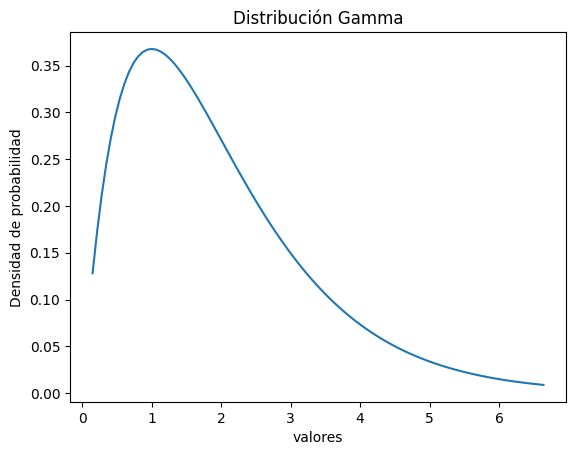

In [ ]:
# Graficando Gamma
a = 2 # parámetro de forma.
b = 1
gamma = stats.gamma(a, scale=b)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Gamma')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('valores')
plt.show()

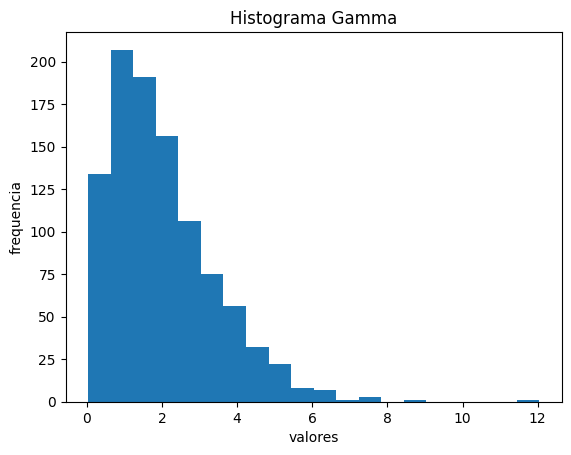

In [ ]:
# histograma
aleatorios_g = gamma.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios_g, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Gamma')
plt.show()

Veamos varias combinaciones de parámetros $\alpha$ y $\beta$. Experimenta con otros valores.

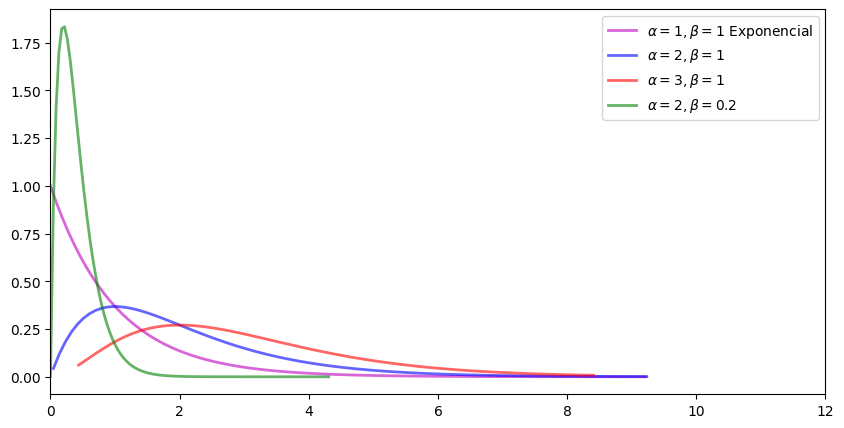

In [ ]:
a0 = 1
b0 = 1
a1 = 2
b1 = 1
a2 = 3
b2 = 1
a3 = 2
b3 = 0.2
loc = 0
size = 100

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
g0 = stats.gamma(a0, scale=b0)
g1 = stats.gamma(a1, scale=b1)
g2 = stats.gamma(a2, scale=b2)
g3 = stats.gamma(a3, scale=b3)

x0 = np.linspace(g0.ppf(0.0001),
                 g0.ppf(0.9999), num=size)
ax.plot(x0, g0.pdf(x0),
        'm-',
        lw=2,
        alpha=0.6,
        label=r'$\alpha = {}, \beta = {}$ Exponencial'.format(a0, b0))

x1 = np.linspace(g1.ppf(0.001),
                 g1.ppf(0.999), num=size)
ax.plot(x1, g1.pdf(x1),
        'b-',
        lw=2,
        alpha=0.6,
        label=r'$\alpha = {}, \beta = {}$'.format(a1, b1))

x2 = np.linspace(g2.ppf(0.01),
                 g2.ppf(0.99), num=size)
ax.plot(x2, g2.pdf(x2),
        'r-',
        lw=2,
        alpha=0.6,
        label=r'$\alpha = {}, \beta = {}$'.format(a2, b2))

x3 = np.linspace(g3.ppf(0.00000001),
                 g3.ppf(0.99999999), num=size)
ax.plot(x3, g3.pdf(x3),
        'g-',
        lw=2,
        alpha=0.6,
        label=r'$\alpha = {}, \beta = {}$'.format(a3, b3))

plt.xlim(0,12)
plt.legend()
plt.show()

## <font color='blue'>**¿Cómo elegir la distribución que mejor se ajusta a mis datos?**</font>

Ahora ya tenemos un conocimiento general de las principales distribuciones con que nos podemos encontrar; pero ¿cómo determinamos que distribución debemos utilizar?

Un modelo que podemos seguir cuando nos encontramos con datos que necesitamos ajustar a una distribución, es comenzar con los datos sin procesar y responder a cuatro preguntas básicas acerca de los mismos, que nos pueden ayudar a caracterizarlos.

La **primer pregunta** se refiere a si los datos **pueden tomar valores discretos** o **continuos**.

La **segunda pregunta** que nos debemos hacer, hace referencia a la [simetría](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) de los datos y, si es que hay asimetría, en qué dirección se encuentra; en otras palabras, son los [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) positivos y negativos igualmente probables o es uno más probable que el otro.

**La tercer pregunta** abarca los **límites superiores e inferiores en los datos**; hay algunos datos, como los ingresos, que no pueden ser inferiores a cero, mientras que hay otros, como los márgenes de operación que no puede exceder de un valor (100%).

**La última pregunta** se refiere a la **posibilidad de observar valores extremos** en la distribución; en algunos casos, los valores extremos ocurren con muy poca frecuencia, mientras que en otros, se producen con mayor frecuencia.

Este proceso, lo podemos resumir en el siguiente gráfico:

![Distribuciones estadísticas](https://drive.google.com/uc?export=view&id=1PbM9bpceTDS3hpTfCA3-o6ZZYEafPlrA)

Con la ayuda de estas preguntas fundamentales, más el conocimiento de las distintas distribuciones deberíamos estar en condiciones de poder caracterizar cualquier conjunto de datos.

### <font color='blue'>**Ejemplo: Ajuste de distribución de probabilidad**</font>

Analizar el dataset de 100 datos de la variable 'tiempo de espera' que es experimentada por los clientes en las cajas de un importante Supermercado.

1) Indicar cual es la mejor distribución estádistica que se ajusta la distribución empírica producida por el dataset.

2) Concluir sobre el test estadístico que se utiliza para seleccionar la distribución teórica.

3) Indicar los parametros de la distribución teórica.

4) Simular un universo de un millón de datos, gráficar y comparar con la distribución empírica.

In [ ]:
data = [0.44945126, 5.2590738, 0.28167967, 0.72323018, 3.11365869, 0.52347752, 3.83136359, 4.82181318, 2.46809553, 9.06440676, 1.97792349, 2.29167921, 7.64311562, 5.3927363, 2.88164336, 1.24519897, 3.87755012, 2.66893171, 6.61958068, 4.01343879, 0.92806589, 1.88542597, 16.26992571, 2.82897633, 1.76865956, 4.64981083, 3.44977119, 3.70810781, 0.40869652, 1.70597353, 1.60481539, 4.3888313, 0.66401549, 5.97789329, 4.42888943, 5.49045846, 2.57259244, 2.14667511, 7.94527437, 7.53019147, 4.81260632, 1.53984552, 5.55717916, 5.57189152, 0.29384042, 5.19379694, 1.50024494, 2.79898598, 0.1197735, 3.55842118, 2.11502917, 3.25655553, 13.589329, 4.28806846, 4.69983509, 2.61883495, 14.51182923, 1.32449317, 10.3923905, 0.79501069, 8.29195936, 1.44029325, 1.73171547, 0.77666469, 3.25759707, 5.07468116, 1.90913549, 4.21134763, 2.61312695, 1.34549856, 0.48520484, 0.47406398, 5.56741607, 2.50014463, 2.5703436, 7.51968496, 1.94204423, 3.24679051, 2.77281025, 2.64330727, 3.85810225, 1.00439797, 0.6627136, 2.11164986, 1.30235165, 6.79125223, 5.93978268, 0.6337219, 0.19580381, 4.52672021, 7.46807689, 1.79054137, 1.33192098, 1.81749536, 2.18929704, 1.98826255, 3.45042869, 1.20160934, 0.39776, 1.3957078]

Para determinar la mejor distribución estadística que se ajusta a los datos del dataset de 100 datos de la variable 'tiempo de espera', podemos realizar un análisis exploratorio de los datos y ajustar diferentes distribuciones para encontrar la que mejor se ajuste.

Primero, vamos a graficar un histograma de los datos para tener una idea visual de su distribución:

Media =  3.4847048594000007
Sigma =  2.9957141940486403


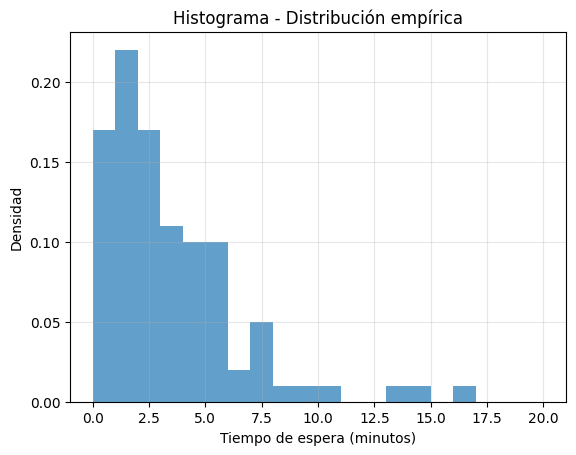

In [ ]:
#Calcular estadísticos
media = np.mean(data)
sigma = np.std(data)
print('Media = ', media)
print('Sigma = ', sigma)

# Graficar el histograma de los datos
plt.hist(data, bins=20, density=True, alpha=0.7, range=(0, 20))
plt.xlabel('Tiempo de espera (minutos)')
plt.ylabel('Densidad')
plt.title('Histograma - Distribución empírica')
plt.grid(True, alpha=0.3)
plt.show()

Podemos observar que la distribución es asimétrica, con un sesgo positivo. Se podría evaluar un ajuste con la distribución Exponencial y Gamma.

A continuación, podemos ajustar ambas distribuciones a los datos y comparar su ajuste utilizando el test de bondad de ajuste de Kolmogorov-Smirnov. Este test compara la distribución empírica de los datos con la distribución teórica ajustada y nos da una medida de qué tan bien se ajusta la distribución teórica a los datos. También incluiremos la distribución Normal para demostrar su baja capacidad de ajuste a la distribución empírica.

In [ ]:
#Test de bondad de ajuste Kolmogorov-Smirnov
# Ajuste de distribución exponencial
params_exp = stats.expon.fit(data)
ks_exp = stats.kstest(data, 'expon', params_exp)

# Ajuste de distribución gamma
params_gamma = stats.gamma.fit(data)
ks_gamma = stats.kstest(data, 'gamma', params_gamma)

# Ajuste de distribución normal
params_normal = stats.norm.fit(data)
ks_normal = stats.kstest(data, 'norm', params_normal)


print("Resultados del test de Kolmogorov-Smirnov:")
print("Distribución exponencial: D =", ks_exp.statistic, ", p-value =", ks_exp.pvalue)
print("Distribución gamma: D =", ks_gamma.statistic, ", p-value =", ks_gamma.pvalue)
print("Distribución normal: D =", ks_normal.statistic, ", p-value =", ks_normal.pvalue)

Resultados del test de Kolmogorov-Smirnov:
Distribución exponencial: D = 0.09632732632704222 , p-value = 0.2923806469743825
Distribución gamma: D = 0.04945527456686716 , p-value = 0.9572154214571448
Distribución normal: D = 0.13977116100908749 , p-value = 0.036295468063189236


Los resultados del test de Kolmogorov-Smirnov nos indican qué tan bien se ajusta cada distribución a los datos. Un p-value alto indica que la distribución teórica se ajusta bien a los datos, mientras que un p-value bajo indica que la distribución teórica no se ajusta bien.

Los resultados del test nos indican que la distribución Gamma se ajusta mejor a los datos, ya que tiene un p-value más alto que la distribución Exponencial y Normal.

Los parámetros de la distribución gamma se obtienen mediante el ajuste a los datos y se pueden utilizar para generar muestras de la distribución ajustada.

In [ ]:
#calculo de parametros Gamma
print(params_gamma)

(1.261870501625813, 0.10333147711257643, 2.679615008624273)


Con estos parámetros simularemos un universo de un millón de datos.

media simulación = 3.4831955635062988
sigma simulación = 3.0006989025703126


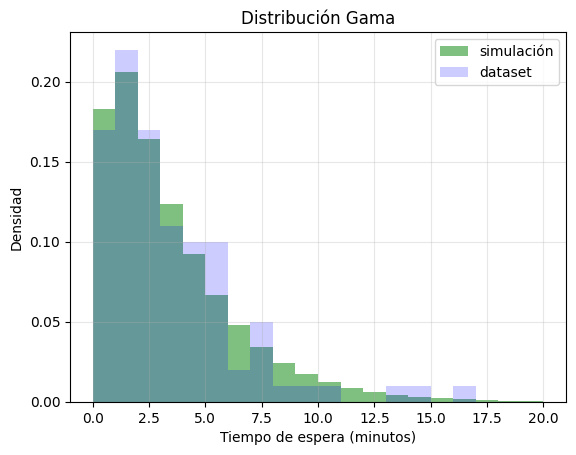

In [ ]:
simulacion = stats.gamma.rvs(a=1.2618, loc=0.1033, scale=2.6796, size=1000000, random_state=None)

print('media simulación =', np.mean(simulacion))
print('sigma simulación =', np.std(simulacion))

# Graficar el histograma de los datos
plt.hist(simulacion, bins=20, density=True, alpha=0.5, color='g', range=(0, 20), label="simulación")
plt.hist(data, bins=20, density=True, alpha=0.2, color='b', range=(0, 20), label="dataset")
plt.xlabel('Tiempo de espera (minutos)')
plt.ylabel('Densidad')
plt.title('Distribución Gama')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

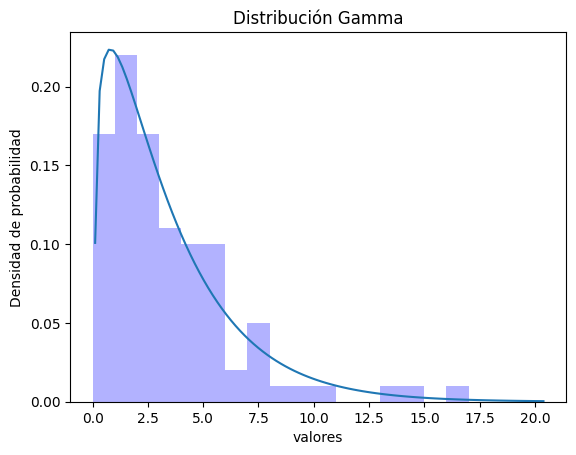

In [ ]:
# Graficando distribución Gamma teórica
a=1.2618
loc=0.1033
scale=2.6796

gamma = stats.gamma(a, loc, scale)
x = np.linspace(gamma.ppf(0.001),
                gamma.ppf(0.999), 100)
fp = gamma.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.hist(data, bins=20, density=True, alpha=0.3, color='b', range=(0, 20), label="dataset")
plt.title('Distribución Gamma')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('valores')
plt.show()

La gráfica nos permite observar un buen ajuste de la distribución empírica con la distribución Gamma simulada. A nivel de parámetros Media y Sigma, la muestra empírica y la simulada son muy similares.

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">
Contenido opcional

## <font color='blue'>**Otras distribuciones continuas**</font>
Las siguientes distribuciones continuas, si bien son utilizadas, tienen una presencia relativa muy menor en trabajos de análisis de datos.

### <font color='blue'>**Distribución Fisher**</font>


La [Distribución de Fisher - Snedecor](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_F) (nombrada por Ronald Fisher y George Snedecor), es de gran aplicación en la inferencia estadística, fundamentalmente en el **contraste de la igualdad de varianzas de dos poblaciones normales**, y , fundamentalmente en el **análisis de la varianza**, técnica que permite detectar la existencia o inexistencia de diferencias significativas entre muestras diferentes y que es, por tanto esencial, en todos aquellos casos en los que se quiere investigar la relevancia de un factor en el desarrollo y naturaleza de una característica.

La distribución se plantea partiendo de dos variables independientes **Y** e **W** tales que:

<br>
$$
\begin{split}
Y &\longrightarrow \chi_{m}^2, \quad chi^2 \quad \text{con m grados de libertad.} \\
W &\longrightarrow \chi_{n}^2, \quad chi^2 \quad\mbox{con n grados de libertad.}
\end{split}
$$
<br>

Se define la variable aleatoria $X$ como:

$$X= \frac{\frac{Y}{m}}{\frac{W}{n}}\sim  F_(m,n)\  $$ por lo tanto, se denota:

$$X\sim  F_(m,n)\  $$
Parámetros

$m >0, m \in \mathbb{N}$

$n >0, n \in \mathbb{N}$


Valores: $x > 0, x \in \mathbb{R}^+$

Su función de densidad:
<br>
$$f(x) = \frac{\Gamma{\frac{m+n}{2}}}{\Gamma{\frac{m}{2}}\Gamma{\frac{n}{2}}} \left(\frac{m}{n}\right)^\frac{m}{2}   \frac{x^\frac{m-2}{2}}{{1+{\frac{mx}{n}}}^{\frac{m+n}{2}}} $$
<br>
La distribución F presenta características definidas que la diferencian de otras distribuciones. Algunas de ellas son:

* Las distribuciones F incluyen varios métodos estadísticos.
* La distribución F particular que se utiliza depende del número de grado de libertad que tiene la muestra. Esta característica de la distribución F también está presente en otras distribuciones, como la distribución T y la distribución chi-cuadrado.
* El valor de la distribución F es nulo, es decir, cero o positivo. No tiene valores negativos.
* La distribución F posee una leve inclinación hacia la derecha. Por lo tanto, se trata de una distribución de probabilidad que no es simétrica.


La distribución F se puede utilizar en diversos estudios de muestras en diferentes campos, desde la industria hasta el sector educativo, científico o estadístico. Por ejemplo, si se desean comparar las calificaciones de un maestro con otro, la precisión de un instrumento con otro, dos máquinas similares, el espesor de dos materiales y cualquier otra variable de interés.

## Observación
Cuando los grados libertad tienden a  $\infty$ : $m\rightarrow \infty $ y $n\rightarrow \infty $, entonces la distribución F de Snedecor se aproxima a la Distribución Normal.



### <font color='blue'>**Distribución de Log-normal**</font>

La distribución log-normal, propuesta por Galton (1822-1911) en 1879, es la **exponencial** de una variable normal(con media $\mu$ y desviación estándar $\sigma)$ y  resulta como consecuencia del estudio de la media geométrica de $n$ variables aleatorias independientes.

La [Distribución Log-normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_log-normal) con parámetros $\mu$ (escala) y $\sigma$ (forma). Dicho de otro modo, si una variable $X$ sigue una distribución lognormal entonces la variable $lnX$ se distribuye normalmente.

Si la variable aleatoria X sigue la distribución lognormal, sus
parámetros son $µ$ y $σ^2$ es decir:

$$ e^X \backsim \text{Lognormal}(µ , σ^2)\ $$


Parámetros:

$\mu$: media, $-\infty \lt \mu \lt \infty$<br>
$\sigma$: desviación estándar, $\sigma \gt 0$<br>
Valores de la variable: $ x >0$<br>

Su función de densidad:

$$f(x) = \frac{1}{ x \sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left(\frac{\ln x - \mu}{\sigma} \right)^2}
$$



La Distribución Log-normal es aplicable a variables aleatorias que están limitadas por cero, pero tienen pocos valores grandes. Es una distribucióncon asimetría positiva. Algunos de los ejemplos en que la solemos encontrar son:
* El peso de los adultos.
* La concentración de los minerales en depósitos.
* Duración de licencia por enfermedad.
* Distribución de riqueza
* Tiempos muertos de maquinarias.
* La distribución lognormal es útil para modelar datos de numerosos estudios médicos tales como el período de incubación de una enfermedad, los títulos de anticuerpo a un virus, el tiempo de supervivencia en pacientes con cáncer o SIDA, el tiempo hasta la seroconversión de VIH+, etc.


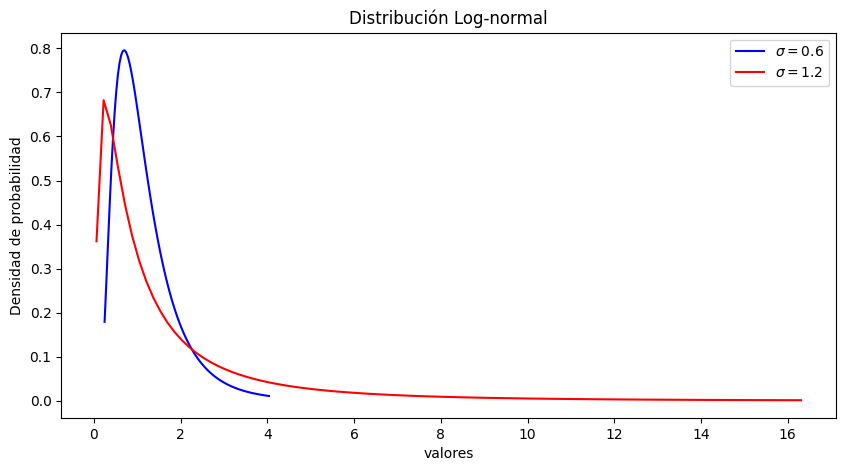

In [ ]:
# Graficando Log-Normal
sigma1 = 0.6 # parámetro
sigma2 = 1.2 # parámetro
lognormal1 = stats.lognorm(sigma1)
lognormal2 = stats.lognorm(sigma2)

x1 = np.linspace(lognormal1.ppf(0.01),
                lognormal1.ppf(0.99), 100)
x2 = np.linspace(lognormal2.ppf(0.01),
                lognormal2.ppf(0.99), 100)
fp1 = lognormal1.pdf(x1) # Función de Probabilidad
fp2 = lognormal2.pdf(x2) # Función de Probabilidad

fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.plot(x1, fp1, color='b', label=r'$\sigma = {}$'.format(sigma1))
plt.plot(x2, fp2, color='r', label=r'$\sigma = {}$'.format(sigma2))
plt.title('Distribución Log-normal')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('valores')
plt.legend(loc=1)
plt.show()

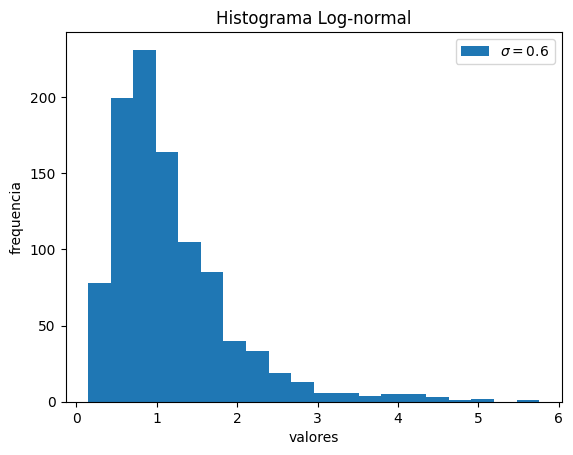

In [ ]:
# histograma
aleatorios_ln = lognormal1.rvs(1000) # genera aleatorios
frecuencia, bins, ignorar = plt.hist(aleatorios_ln, 20, label=r'$\sigma = {}$'.format(sigma1))
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Log-normal')
plt.legend(loc=1)
plt.show()

### <font color='blue'>**Distribución Beta**</font>

La [Distribución Beta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_beta) es adecuada para variables aleatorias continuas que toman valores en el intervalo (0,1), lo que la hace muy apropiada para modelar proporciones.
Uno de los principales recursos de esta distribución es el ajuste a una gran variedad de distribuciones empíricas, pues adopta formas muy diversas dependiendo de cuáles sean los valores de los parámetros de forma p y q, mediante los que viene definida la distribución,
denotada por $Beta(p,q)$.
Está dada por la formula:

$$f(x) = \frac{1}{B(p, q)} x^{p-1}(1 - x)^{q-1}
$$

Parámetros:<br>
$p$: forma, con $p\gt 0$<br>
$q$: forma, con $q\gt 0$<br>

Valores: $0 \lt x \lt 1$

En dónde los parámetros $p$ y $q$ son números reales positivos, la variable $x$ satisface la condición $0 \le x \le 1$ y $B(p, q)$ es la [función beta](https://es.wikipedia.org/wiki/Funci%C3%B3n_beta). Las aplicaciones de la Distribución Beta incluyen el modelado de variables aleatorias que tienen un rango finito de $a$ hasta $b$. Un ejemplo de ello es la distribución de los tiempos de actividad en las redes de proyectos.

En la [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana), por ejemplo, es muy utilizada como distribución a priori cuando las
observaciones tienen una distribución binomial.

Un caso particular de la distribución beta es la **distribución uniforme** en $(0,1)$, la cual se corresponde con una beta de parámetros $p = 1$ y $q = 1$.

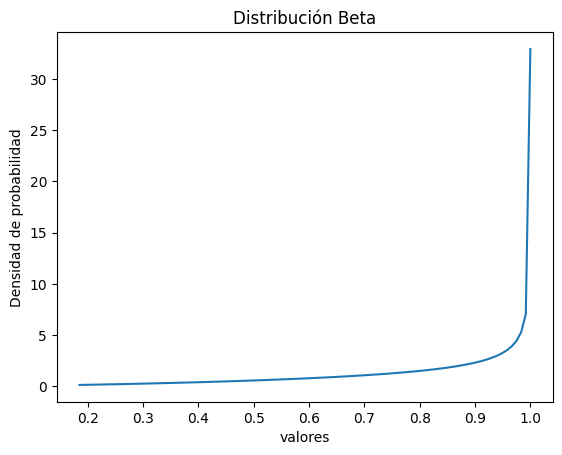

In [ ]:
# Graficando Beta
a, b = 2.3, 0.6 # parametros de forma.
beta = stats.beta(a, b)
x = np.linspace(beta.ppf(0.01),
                beta.ppf(0.99), 100)
fp = beta.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Beta')
plt.ylabel('Densidad de probabilidad')
plt.xlabel('valores')
plt.show()

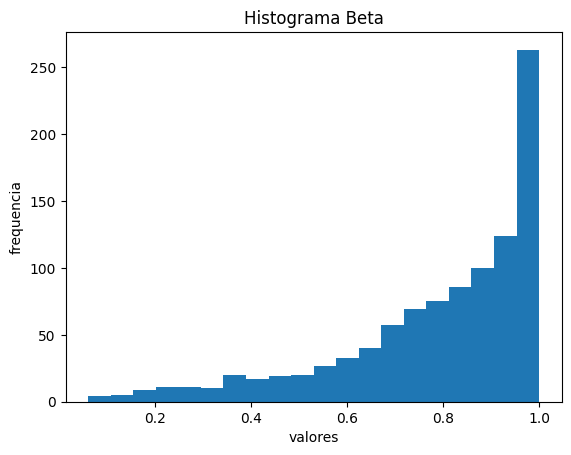

In [ ]:
# histograma
aleatorios_bt = beta.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios_bt, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Beta')
plt.show()

### <font color='green'>Actividad 5</font>
Compruebe gráficamente que un caso particular de la distribución beta es la distribución uniforme en  (0,1).

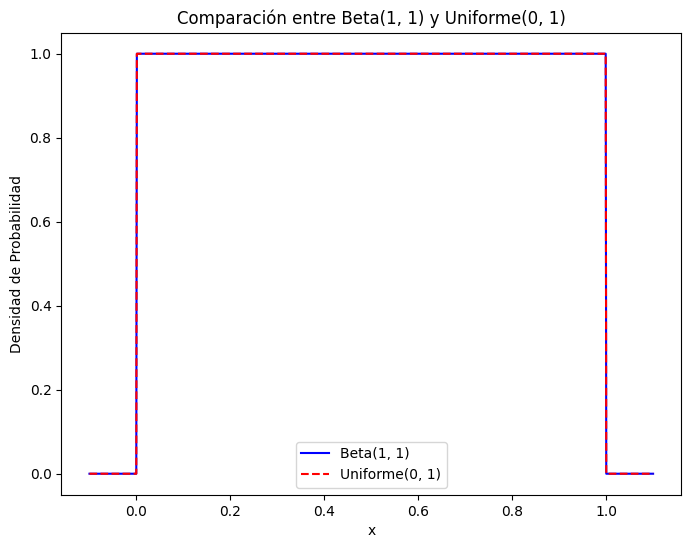

In [ ]:
# Tu código aquí ...


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Definimos una función de densidad de probabilidad uniforme en (0,1)
def uniform_pdf(x):
    return np.where((x >= 0) & (x <= 1), 1, 0)

# Generamos un rango de valores x
x = np.linspace(-0.1, 1.1, 1000)

# Calculamos la PDF de la distribución beta con α = β = 1
pdf_beta = beta.pdf(x, 1, 1)

# Calculamos la PDF de la distribución uniforme en (0,1)
pdf_uniform = uniform_pdf(x)

# Creamos la figura
plt.figure(figsize=(8, 6))

# Graficamos ambas PDF
plt.plot(x, pdf_beta, label='Beta(1, 1)', color='blue')
plt.plot(x, pdf_uniform, label='Uniforme(0, 1)', color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('x')
plt.ylabel('Densidad de Probabilidad')
plt.title('Comparación entre Beta(1, 1) y Uniforme(0, 1)')

# Leyenda
plt.legend()

# Mostramos el gráfico
plt.show()


gráficamente la función de densidad de probabilidad (PDF) de una distribución beta con parámetros
α=β=1 y la distribución uniforme en el intervalo (0,1)

α=β=1 es idéntica a la distribución uniforme en el intervalo
(0,1)
Ambas PDFs serán líneas horizontales a una altura de 1 en el intervalo


<font color='green'>Fin actividad 5</font>

### <font color='blue'>**Distribución de Pareto**</font>

La [Distribución de Pareto](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto) fue introducida por el economista italiano Vilfredo Pareto (1848- 1923) como un modelo para explicar la distribución de las rentas de los individuos de una población, siempre y cuando se partiera de dos supuestos, la existencia de un umbral inferior ($x_0$) de forma que no haya rentas inferiores a dicho umbral y el decrecimiento de manera potencial del porcentaje de individuos con una renta superior o igual a un cierto valor de
renta a medida que dicho valor de renta crece.

El uso de esta distribución se ha ido ampliando a diferentes ámbitos de estudio. Se trata de una distribución biparamétrica, con parámetros de forma ($\alpha$) y de situación ($x_0$).
El parámetro $x_0$ es un indicador de posición (valor mínimo) que, en términos económicos, puede interpretarse como el ingreso mínimo de la población. El parámetro $\alpha$ está asociado con la dispersión, donde a mayor valor se obtienen densidades de Pareto más concentradas en las proximidades de $x_0$, es decir, menos dispersas.

La variable aleatoria X sigue una  una distribución de Pareto:

$$X \backsim Pareto{(\alpha,x_0) }$$

Parámetros:

$\alpha > 0$, forma<br>
Valores: $x_0 > 0 $ donde ($x \lt x_0)$, escala<br>

La distribución está dada por la función:

$$f(x) = \frac{\alpha x_0^{\alpha}}{x_0^{\alpha + 1}}
$$
<br>

La Distribución de Pareto se describe a menudo como la base de la [regla 80/20](https://es.wikipedia.org/wiki/Principio_de_Pareto). Por ejemplo, el 80% de las quejas de los clientes con respecto al funcionamiento de su vehículo por lo general surgen del 20% de los componentes.

Ejemplos:
* Distribución de los tamaños de los archivos del tráfico de Internet que utiliza el protocolo TCP (muchos archivos pequeños, pocos archivos grandes
* La distribución de la longitud en los trabajos asignados a los superordenadores (unos pocos grandes, muchos pequeños)
* La rentabilidad estandarizada de los precios de las acciones individuales
* Los tamaños de las partículas de arena.
* La gravedad de las grandes pérdidas por fallecimiento en el negocio de Seguros, para ciertas líneas de negocio como la responsabilidad civil general, el automóvil comercial y la compensación de los trabajadores.


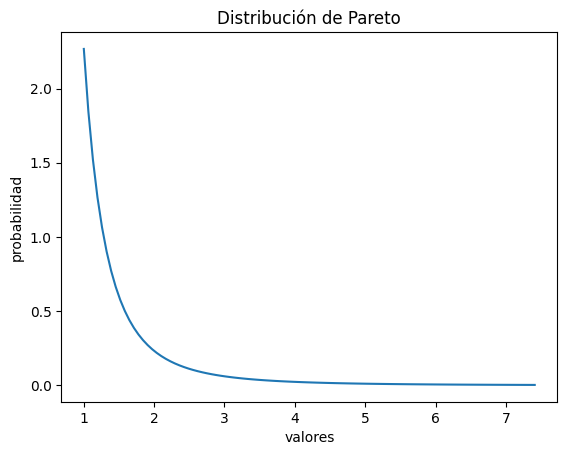

In [ ]:
# Graficando Pareto
k = 2.3 # parametro de forma.
pareto = stats.pareto(k)
x = np.linspace(pareto.ppf(0.01),
                pareto.ppf(0.99), 100)
fp = pareto.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución de Pareto')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

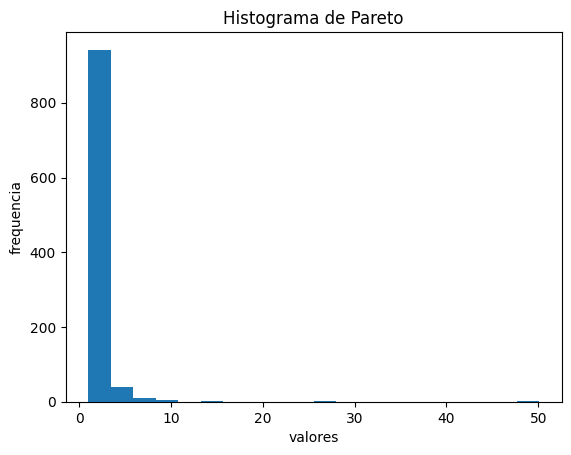

In [ ]:
# histograma
aleatorios = pareto.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma de Pareto')
plt.show()

##<font color='blue'> **¿Qué son los grados de libertad?**</font>

En la estadística inferencial, el término __grados de libertad__ se define normalmente como el número de observaciones que son libres de variar, dada una o más restricciones matemáticas, en un conjunto de valores utilizados para estimar alguna característica de la población.

Dicho de otra manera, los grados de libertad son el número de observaciones independientes menos el número de restricciones asociado a esas observaciones.

### Veamos un ejemplo con la varianza muestral
Grados de libertad en el cálculo de la varianza muestral
Seguramente, la primera vez donde nos encontramos este concepto es a la hora de calcular la varianza de una muestra, medida que representa la variabilidad de un conjunto de datos de una muestra y que se calcula mediante la siguiente fórmula:

$$ s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {x}}\right)^{2}$$

donde

$x_i$ es valor la observación número $i$.<br>
$\bar{x}$ es la media de la muestra.<br>
$n$ es el número de observaciones en la muestra.

En esta formula, los grados de libertad se encuentran en el denominador y equivalen al __número de observaciones menos 1__ $(n – 1)$, por lo que solo tenemos una única restricción.

Esta restricción se debe a que para calcular la varianza muestral es necesario calcular previamente la media de la muestra ($\bar{x}$), por lo que el último valor y única observación que no es libre de variar, se puede obtener fácilmente utilizando el resto de observaciones.

Asimismo, en el caso de la media muestral, los grados de libertad equivalen al número de observaciones $n$, ya que no contamos con ninguna restricción.

A modo de ejemplo, imaginemos que tenemos una muestra con 5 observaciones, sabemos que la media muestral corresponde a 8 y queremos calcular la varianza muestral. La restricción que se debe cumplir consiste en que la suma de todos los datos ($x_1 + x_2 + x_3 + x_4 + x_5$) debe ser igual a $n \times \bar{x}$, en este caso, $5 \times 8 = 40$.

Otra manera de verlo es que la suma de las desviaciones de las observaciones con respecto a la media $(x_1 – \bar{x}, x_2 – \bar{x}, x_3 – \bar{x}, x_4 – \bar{x}$ y $x_5 – \bar{x})$ debe ser igual a cero.

Con esta restricción, tenemos que los primeros 4 valores pueden ser cualquier número, pero para que los 5 valores sumen 40, el último valor no puede variar. Por lo tanto, tenemos 4 grados de libertad.

Así, si los primeros 4 valores son 6, 6, 8 y 10, sabemos automáticamente que el último valor corresponde a 10, ya que la suma de los 5 números debe ser igual a 40.

Si utilizásemos $n$ para calcular la varianza, estaríamos subestimando la variabilidad de la población. Por ello, recurrimos a $n – 1$ para conseguir una estimación no sesgada de la varianza de la población.



<img src="https://drive.google.com/uc?export=view&
id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="50" align="left" title="Runa-perth">